# STEP #0: PROBLEM STATEMENT  

- Transfer learning is a machine learning technique in which intelligence (i.e.: weights) from a base artificial neural network is being transferred to a new network as a starting point to perform a specific task. 
- Transfer learning is a key skill to acquire as a data scientist since it can dramatically reduce the computational time required if the network is being trained from scratch (i.e.: starting from purely random weights). 
- In this project, we will apply Transfer learning to repurpose trained weights from ResNet 50, which is a famous deep network, to perform classification tasks on a new datasets. 
- A pre-trained ResNet50 model that has been trained on ImageNet will be repurposed and used to classify new images of cats and dogs
- The new model will consist of two part: 
    - (1) "base" pre-trained network  
    - (2) "new dense network classifier"
- The feature maps that has been previously trained will be augmented with a new classifier (new Dense layers) so we do not have to train the model from scratch 
- Fine tuning can be performed by unfreezing the top layers (base) and slowly training the entire network so an improved performance can be achieved. 
- ResNet50 is a deep residual learning architecture that is widely used for image classification
- The ResNet50 is trained using ImageNet which is an open source repository of images
- Citations: Olga Russakovsky, Jia Deng, Hao Su, Jonathan Krause, Sanjeev Satheesh, Sean Ma, Zhiheng Huang, Andrej Karpathy, Aditya Khosla, Michael Bernstein, Alexander C. Berg and Li Fei-Fei. (* = equal contribution) ImageNet Large Scale Visual Recognition Challenge. arXiv:1409.0575, 2014.
- Paper: https://arxiv.org/abs/1409.0575
- Data Source: https://www.kaggle.com/tongpython/cat-and-dog

# STEP #1: IMPORT LIBRARIES

In [ ]:
!pip install tensorflow-gpu==2.9.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

# STEP #2: IMPORT MODEL WITH PRE-TRAINED WEIGHTS

In [ ]:
model = tf.keras.applications.ResNet50(weights='imagenet')

# STEP #3: EVALUATE THE PRE-TRAINED MODEL (JUST TO BE SURE :)!)

- Check this out: http://www.image-net.org/synset?wnid=n02835271
- Search for Bicycle
- https://lear.inrialpes.fr/people/gordo/ImageNetResults/sift1000_accuracy_withPrior/results_sift_0253.htm

In [ ]:
Sample_Image= tf.keras.preprocessing.image.load_img(r'African_Elephant.jpg', target_size = (224, 224))

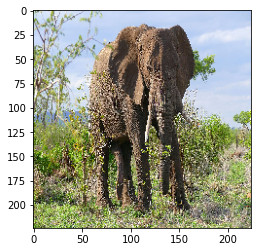

In [ ]:
plt.imshow(Sample_Image)

In [ ]:
Sample_Image = tf.keras.preprocessing.image.img_to_array(Sample_Image)

In [ ]:
np.shape(Sample_Image)

(224, 224, 3)

In [ ]:
Sample_Image = np.expand_dims(Sample_Image, axis=0)
np.shape(Sample_Image)

(1, 224, 224, 3)

In [ ]:
Sample_Image.max()

255.0

In [ ]:
Sample_Image.min()

0.0

In [ ]:
Sample_Image = tf.keras.applications.resnet50.preprocess_input(Sample_Image)

In [ ]:
Sample_Image.max()

151.061

In [ ]:
Sample_Image.min()

-123.68

In [ ]:
predictions = model.predict(Sample_Image)

1/1 [==============================] - 3s 3s/step


In [ ]:
print('predictions:', tf.keras.applications.resnet50.decode_predictions(predictions, top=5)[0])

predictions: [('n01871265', 'tusker', 0.6575599), ('n02113799', 'standard_poodle', 0.120742835), ('n02504458', 'African_elephant', 0.0957176), ('n02504013', 'Indian_elephant', 0.08039234), ('n02102973', 'Irish_water_spaniel', 0.022263937)]


# STEP #4: APPLY TRANSFER LEARNING AND RETRAIN THE MODEL

In [ ]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False)

In [ ]:
print(base_model.summary())

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

In [ ]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_2
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [ ]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=True)

In [ ]:
print(base_model.summary())

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name)

0 input_3
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [ ]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False)
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [ ]:
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(2, activation='softmax')(x)

In [ ]:
model = tf.keras.models.Model(inputs = base_model.input, outputs = preds)

In [ ]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_7[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                           

In [ ]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_7
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [ ]:
for layer in model.layers[:175]:
    layer.trainable = False

In [ ]:
for layer in model.layers[175:]:
    layer.trainable = True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function= tf.keras.applications.resnet50.preprocess_input)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Udemy/TF 2.0 Practical Advanced Course Package/3. Transfer Learning/Transfer Learning Data/train', 
                                                   target_size=(224, 224),
                                                   color_mode='rgb',
                                                   batch_size=32,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 160 images belonging to 2 classes.


In [37]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=train_generator.n//train_generator.batch_size, epochs = 5)

<ipython-input-38-58e66381c347>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator, steps_per_epoch=train_generator.n//train_generator.batch_size, epochs = 5)


Epoch 1/5
5/5 [==============================] - 31s 6s/step - loss: 1.1653 - accuracy: 0.6000
Epoch 2/5
5/5 [==============================] - 1s 178ms/step - loss: 0.1161 - accuracy: 0.9563
Epoch 3/5
5/5 [==============================] - 1s 176ms/step - loss: 0.0755 - accuracy: 0.9688
Epoch 4/5
5/5 [==============================] - 1s 216ms/step - loss: 0.0862 - accuracy: 0.9688
Epoch 5/5
5/5 [==============================] - 1s 187ms/step - loss: 4.9347e-04 - accuracy: 1.0000


# STEP #5: EVALUATE THE MODEL

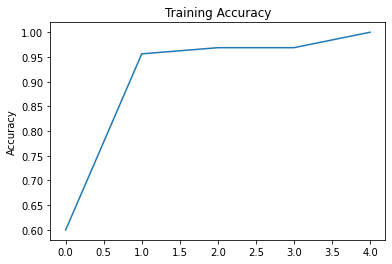

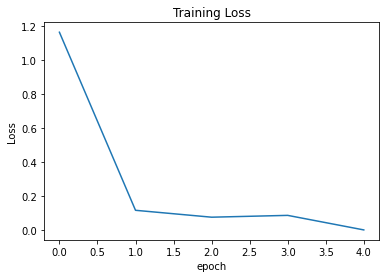

In [39]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure()
plt.plot(acc, label='Training Accuracy')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.figure()

plt.plot(loss, label='Training Loss')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

In [49]:
Sample_Image= tf.keras.preprocessing.image.load_img(r'/content/drive/MyDrive/Udemy/TF 2.0 Practical Advanced Course Package/3. Transfer Learning/Transfer Learning Data/train/cats/cat.6.jpg', target_size = (224, 224))

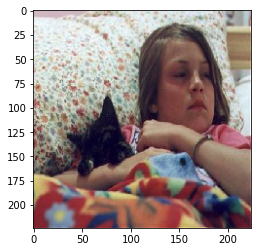

In [50]:
plt.imshow(Sample_Image)

In [51]:
Sample_Image = tf.keras.preprocessing.image.img_to_array(Sample_Image)
np.shape(Sample_Image)

(224, 224, 3)

In [52]:
Sample_Image = np.expand_dims(Sample_Image, axis = 0)

In [53]:
Sample_Image = tf.keras.applications.resnet50.preprocess_input(Sample_Image)
predictions = model.predict(Sample_Image)
print('Predictions:', predictions)

1/1 [==============================] - 0s 26ms/step
Predictions: [[9.9923825e-01 7.6179393e-04]]


In [54]:
Sample_Image= tf.keras.preprocessing.image.load_img(r'/content/drive/MyDrive/Udemy/TF 2.0 Practical Advanced Course Package/3. Transfer Learning/Transfer Learning Data/train/dogs/dog.34.jpg', target_size = (224, 224))

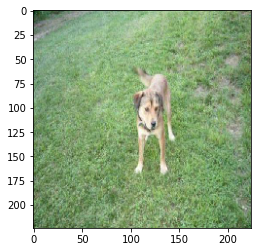

In [55]:
plt.imshow(Sample_Image)

In [56]:
Sample_Image = tf.keras.preprocessing.image.img_to_array(Sample_Image)
np.shape(Sample_Image)

(224, 224, 3)

In [57]:
Sample_Image = np.expand_dims(Sample_Image, axis = 0)


In [58]:
Sample_Image = tf.keras.applications.resnet50.preprocess_input(Sample_Image)
predictions = model.predict(Sample_Image)
print('Predictions:', predictions)

1/1 [==============================] - 0s 22ms/step
Predictions: [[1.02402296e-07 9.99999881e-01]]
